In [4]:
import util
import numpy as np
import matplotlib.pyplot as plt

np.seterr(all='raise')
factor = 2.0

In [57]:
class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, theta=None):
        """
        Args:
            theta: Weights vector for the model.
        """
        self.theta = theta

    def fit(self, X, y):
        """Run solver to fit linear model. You have to update the value of
        self.theta using the normal equations.

        Args:
            X: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        y = y.reshape(len(X), 1) #instead of 1 array with length(X), each entry is individual row
        self.theta = np.linalg.solve(X.T @ X, X.T @ y)
        # *** END CODE HERE ***

    def create_poly(self, k, X):
        """
        Generates a polynomial feature map using the data x.
        The polynomial map should have powers from 0 to k
        Output should be a numpy array whose shape is (n_examples, k+1)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        # *** START CODE HERE ***
        
        for i in range(2, k+1):
            x_pow = np.power(X[:,1], i) #gives row of x ^ i
            x_pow = x_pow.reshape(len(X), 1) #instead of  1 array with length(X) we get column
            X = np.hstack([X, x_pow]) # stack it column wise on X as X is already 1,x so becomes 1, x, x^2, x^3
        return X
        # *** END CODE HERE ***

    def create_sin(self, k, X):
        """
        Generates a sin with polynomial featuremap to the data x.
        Output should be a numpy array whose shape is (n_examples, k+2)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        # *** START CODE HERE ***

        for i in range(2, k+1): 
            x_pow = np.power(X[:,1], i) #gives row of x ^ i
            x_pow = x_pow.reshape(len(X), 1) #instead of  1 array with length(X) we get column
            X = np.hstack([X, x_pow]) # stack it column wise on X as X is already 1,x so becomes 1, x, x^2, x^3
        
        sin_x = np.sin( X[:,1] )
        sin_x = sin_x.reshape( len(X), 1)
    
        X = np.hstack( [ X, sin_x ] )
        
        return X
        # *** END CODE HERE ***

    def predict(self, X):
        """
        Make a prediction given new inputs x.
        Returns the numpy array of the predictions.

        Args:
            X: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        return X @ self.theta
        # *** END CODE HERE ***

In [70]:
def run_exp(train_path, sine=False, ks=[1, 2, 3, 5, 10, 20], filename='plot.png'):
    train_x,train_y=util.load_dataset(train_path,add_intercept=True)
    plot_x = np.ones([1000, 2])
    plot_x[:, 1] = np.linspace(-factor*np.pi, factor*np.pi, 1000)
    plt.figure()
    plt.scatter(train_x[:, 1], train_y)

    for k in ks:
        '''
        Our objective is to train models and perform predictions on plot_x data
        '''
        # *** START CODE HERE ***
        model = LinearModel()
        if sine:
            train_phi = model.create_sin(k, train_x)
            plot_phi = model.create_sin(k, plot_x)
        else:
            train_phi = model.create_poly(k,train_x)
            plot_phi = model.create_poly(k, plot_x)
        model.fit(train_phi, train_y)
        plot_y = model.predict(plot_phi)
        # *** END CODE HERE ***
        '''
        Here plot_y are the predictions of the linear model on the plot_x data
        '''
        plt.ylim(-2, 2)
        plt.plot(plot_x[:, 1], plot_y, label='k=%d' % k)

    plt.legend()
    plt.title(("x power "+str(ks)+", sine "+ str(sine)))
    plt.show()
    plt.savefig(filename)
    plt.clf()

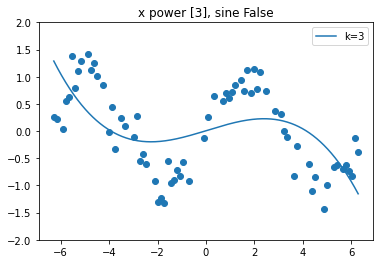

<Figure size 432x288 with 0 Axes>

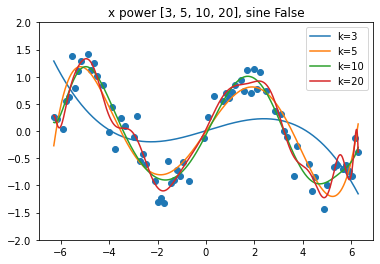

<Figure size 432x288 with 0 Axes>

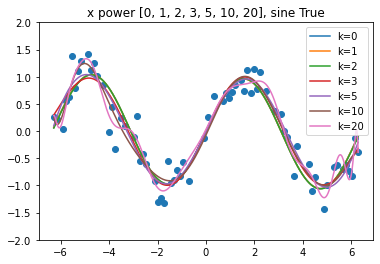

<Figure size 432x288 with 0 Axes>

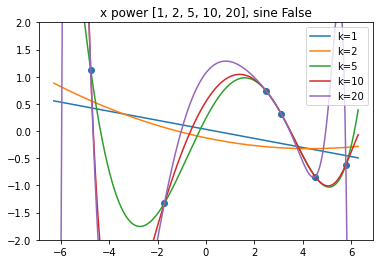

<Figure size 432x288 with 0 Axes>

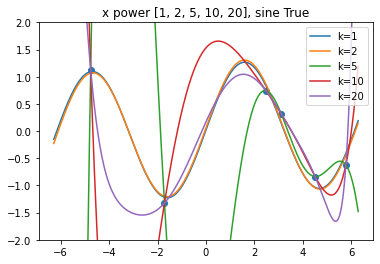

<Figure size 432x288 with 0 Axes>

In [75]:
def main(train_path, small_path, eval_path):
    '''
    Run all expetriments
    '''
    # *** START CODE HERE ***
    run_exp(train_path, False, [3], "5b.png")
    run_exp(train_path, False, [3,5,10,20], "5c.png")
    run_exp(train_path, True, [0,1,2,3,5,10,20], "5d.png")
    run_exp(small_path, False, [1,2,5,10,20], "5e.png")
    run_exp(small_path, True, [1,2,5,10,20], "5f.png")
    # *** END CODE HERE ***

main(train_path='train.csv',small_path='small.csv', eval_path='test.csv')

## In general, without sine, higher powers fit better due to structure of data but very high soon over fit
## When sin is a feature, even low powers of x can fit well as the sin terms captures majority of the structure in the data
## for small data, higher powers fit well but they can quickly over fit